In [1]:
import pandas as pd
# Load the dataset with 'latin1' encoding
df = pd.read_csv("C:/Users/sherv/Downloads/archive (1)/Global YouTube Statistics.csv", encoding='latin1')

# Overview again
overview = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "head": df.head()
}
overview

{'shape': (995, 28),
 'columns': ['rank',
  'Youtuber',
  'subscribers',
  'video views',
  'category',
  'Title',
  'uploads',
  'Country',
  'Abbreviation',
  'channel_type',
  'video_views_rank',
  'country_rank',
  'channel_type_rank',
  'video_views_for_the_last_30_days',
  'lowest_monthly_earnings',
  'highest_monthly_earnings',
  'lowest_yearly_earnings',
  'highest_yearly_earnings',
  'subscribers_for_last_30_days',
  'created_year',
  'created_month',
  'created_date',
  'Gross tertiary education enrollment (%)',
  'Population',
  'Unemployment rate',
  'Urban_population',
  'Latitude',
  'Longitude'],
 'head':    rank                    Youtuber  subscribers   video views  \
 0     1                    T-Series    245000000  2.280000e+11   
 1     2              YouTube Movies    170000000  0.000000e+00   
 2     3                     MrBeast    166000000  2.836884e+10   
 3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
 4     5                   SET India  

In [2]:
# Clean and Standardize Dataset
def clean_data(df):
    # 1. Lowercase column names and replace spaces with underscores
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    
    # 2. Handle missing values: Fill missing numerical data with 0
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[num_cols] = df[num_cols].fillna(0)
    
    # 3. Convert 'subscribers' and 'video_views' to integers
    df['subscribers'] = df['subscribers'].astype(int)
    df['video_views'] = df['video_views'].astype(int)
    
    return df

# Apply cleaning
df_cleaned = clean_data(df)
df_cleaned.head()

,rank,youtuber,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment_(%),population,unemployment_rate,urban_population,latitude,longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,...,0.0,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [3]:
from textblob import TextBlob

# Sentiment analysis function
def get_sentiment(text):
    if pd.isna(text) or text.strip() == '':
        return 0
    return TextBlob(text).sentiment.polarity

# Apply to 'title'
df_cleaned['title_sentiment'] = df_cleaned['title'].apply(get_sentiment)

# Check
df_cleaned[['title', 'title_sentiment']].head()

,title,title_sentiment
0,T-Series,0.0
1,youtubemovies,0.0
2,MrBeast,0.0
3,Cocomelon - Nursery Rhymes,0.0
4,SET India,0.0


In [4]:
# Install textblob if you haven't already
# pip install textblob

from textblob import TextBlob
import pandas as pd

# Load the cleaned dataset again if needed
file_path = "C:/Users/sherv/Downloads/archive (1)/Global YouTube Statistics.csv"
df = pd.read_csv("C:/Users/sherv/Downloads/archive (1)/Global YouTube Statistics.csv", encoding='latin1')

# Clean again quickly
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['subscribers'] = df['subscribers'].fillna(0).astype(int)
df['video_views'] = df['video_views'].fillna(0).astype(int)

# Sentiment analysis function
def get_sentiment(text):
    if pd.isna(text) or text.strip() == '':
        return 0
    return TextBlob(text).sentiment.polarity

# Apply to 'title'
df['title_sentiment'] = df['title'].apply(get_sentiment)

# Check result
print(df[['title', 'title_sentiment']].head())

                        title  title_sentiment
0                    T-Series              0.0
1               youtubemovies              0.0
2                     MrBeast              0.0
3  Cocomelon - Nursery Rhymes              0.0
4                   SET India              0.0


In [6]:
# Install pandasql if needed
# pip install pandasql

import pandasql as ps
import pandas as pd

# Load and clean the dataset again
file_path = "C:/Users/sherv/Downloads/archive (1)/Global YouTube Statistics.csv"
df = pd.read_csv("C:/Users/sherv/Downloads/archive (1)/Global YouTube Statistics.csv", encoding='latin1')

# Basic cleaning
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['subscribers'] = df['subscribers'].fillna(0).astype(int)
df['video_views'] = df['video_views'].fillna(0).astype(int)

# SQL query: Rank categories by average video views
query = """
SELECT 
    category, 
    AVG(video_views) AS avg_video_views
FROM 
    df
GROUP BY 
    category
ORDER BY 
    avg_video_views DESC
"""

# Execute query
ranked_categories = ps.sqldf(query, locals())

# Display result
print(ranked_categories)

                 category  avg_video_views
0                   Shows     3.432360e+10
1                Trailers     1.663136e+10
2               Education     1.548032e+10
3                   Music     1.545286e+10
4                  Sports     1.345330e+10
5        Film & Animation     1.183527e+10
6          Pets & Animals     1.121669e+10
7           Entertainment     1.048854e+10
8         News & Politics     1.039969e+10
9          People & Blogs     9.589327e+09
10                 Comedy     7.972649e+09
11                 Movies     7.691628e+09
12                 Gaming     7.634456e+09
13       Autos & Vehicles     7.501729e+09
14                   None     6.622682e+09
15  Nonprofits & Activism     5.431456e+09
16          Howto & Style     5.045439e+09
17   Science & Technology     3.939809e+09
18        Travel & Events     3.140883e+09


C:\Users\sherv\AppData\Local\Temp\ipykernel_13832\3886475112.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


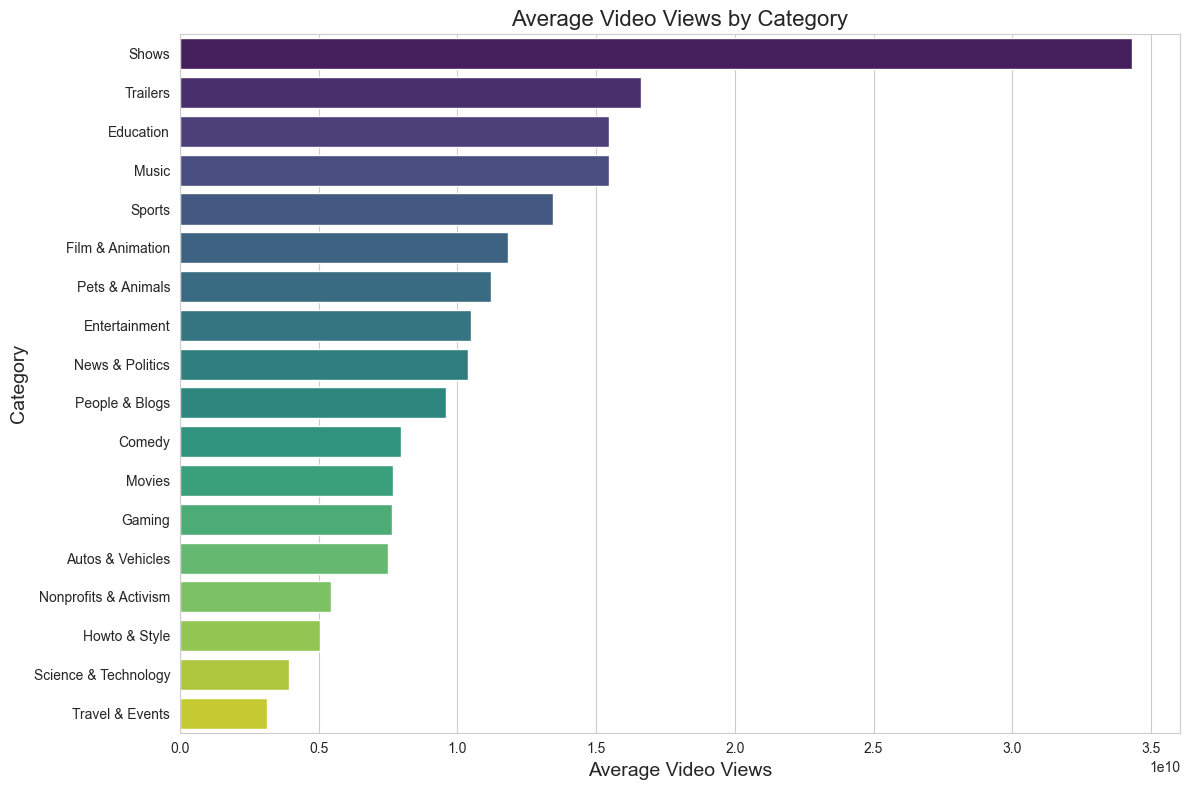

In [7]:
# Install seaborn if you haven't
# pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Create the barplot
sns.barplot(
    x='avg_video_views', 
    y='category', 
    data=ranked_categories, 
    palette='viridis'
)

# Title and labels
plt.title('Average Video Views by Category', fontsize=16)
plt.xlabel('Average Video Views', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

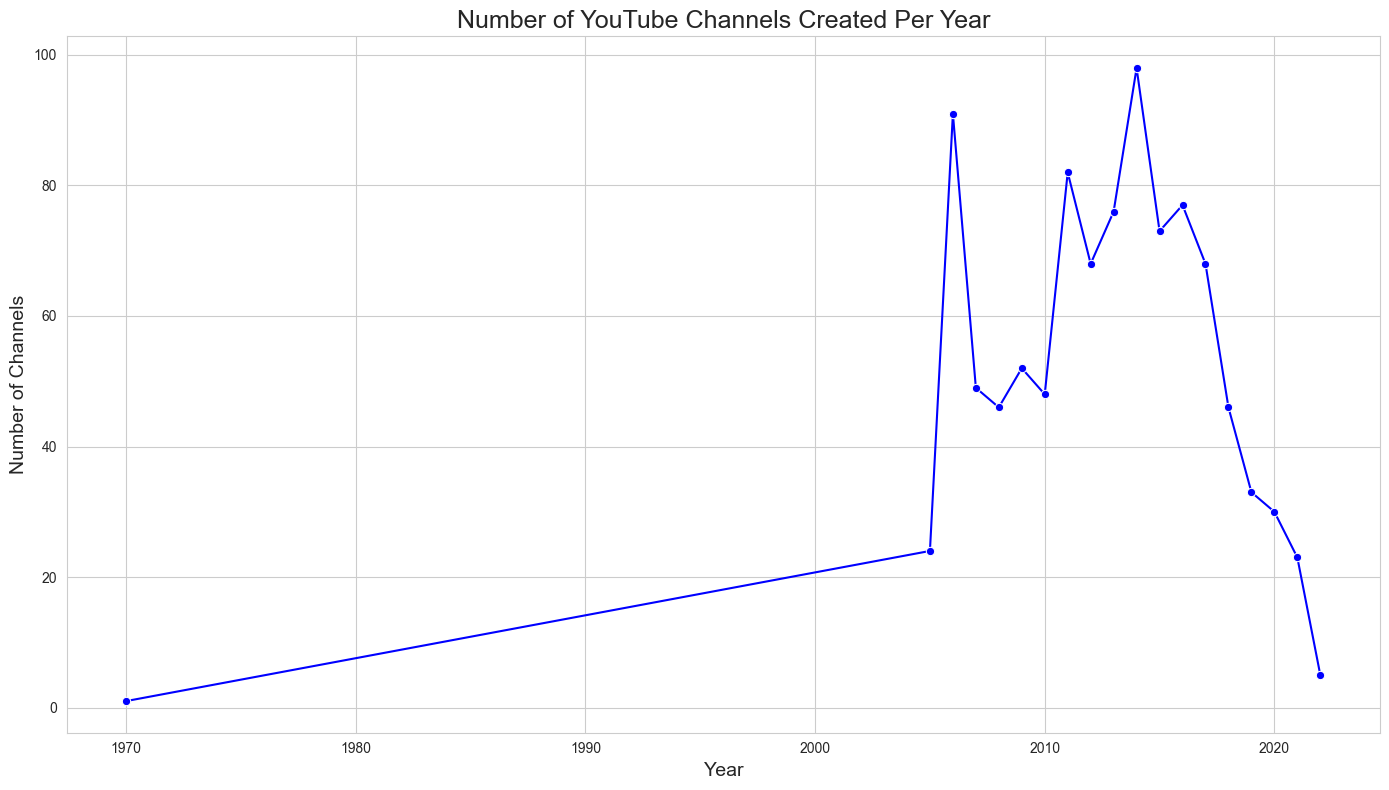

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reload cleaned data if needed
file_path = "C:/Users/sherv/Downloads/archive (1)/Global YouTube Statistics.csv"
df = pd.read_csv("C:/Users/sherv/Downloads/archive (1)/Global YouTube Statistics.csv", encoding='latin1')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Clean 'created_year' (some might be missing)
df['created_year'] = df['created_year'].fillna(0).astype(int)

# Remove entries with 0 year
df = df[df['created_year'] > 0]

# Group by created year
yearly_counts = df['created_year'].value_counts().reset_index()
yearly_counts.columns = ['year', 'count']
yearly_counts = yearly_counts.sort_values('year')

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='count', data=yearly_counts, marker='o', color='blue')

# Titles and labels
plt.title('Number of YouTube Channels Created Per Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Channels', fontsize=14)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()